# Chirped Z-transform (CZT)


CZT allows, in a single step, to propagate to a near or far observation plane. IThe main advantage of CZT is that the region of interest and the sampling numbers can be arbitrarily chosen, endowing CZT with superior flexibility, and produces much faster results (acceleration > x100 with respect to RS algorithm) for focusing and far field diffraction patterns.

As the sampling area and pixels can be reduced to the desired observation area, the storage is also greatly reduced.

CZT algorithm allows to have a XY mask and compute in XY, Z, XZ, XYZ schemes, simply defining the output arrays.


## X Scheme


In [1]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_fields_Z import Scalar_field_Z

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [2]:
size = 250 * um
xin = np.linspace(-size, size, 4096)
wavelength = 550 * nm
z = 2 * mm

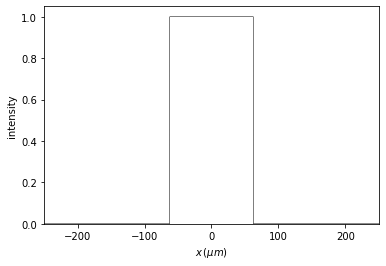

In [3]:
t0 = Scalar_mask_X(xin, wavelength)
t0.slit(x0=0, size=size / 2)
u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0
u1.draw()

### to just one data


In [4]:
xout = 0.0
z = 2 * mm

In [5]:
u2 = u1.CZT(z, xout)
print(u2)

[-0.60319534+0.63252658j]


### to field_Z


In [6]:
xout = 0
z = np.linspace(0.5 * mm, 10 * mm, 256)

In [7]:
%%time
u2 = u1.CZT(z, xout, verbose=True)


CPU times: user 1.07 s, sys: 3 ms, total: 1.07 s
Wall time: 1.07 s


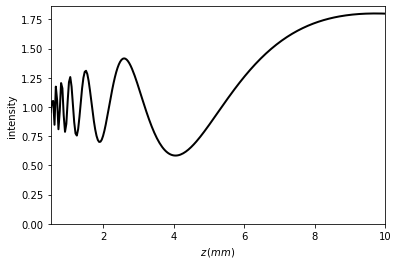

In [8]:
u2.draw(z_scale="mm")

### to field_X


In [9]:
xout = np.linspace(-size, size, 256)
z = 2 * mm

In [10]:
%%time
u2 = u1.CZT(z, xout)


CPU times: user 13.2 ms, sys: 839 µs, total: 14 ms
Wall time: 12.5 ms


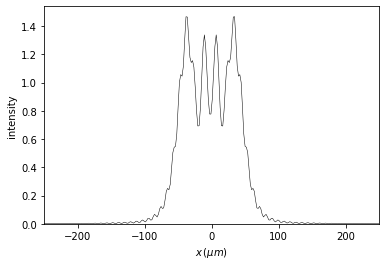

In [11]:
u2.draw()

### to field_XZ


In [12]:
xout = np.linspace(-size / 2, size / 2, 512)
z = np.linspace(1 * mm, 15 * mm, 128)

In [13]:
%%time
u2 = u1.CZT(z, xout, verbose=True)


CPU times: user 1.17 s, sys: 4.33 ms, total: 1.17 s
Wall time: 1.17 s


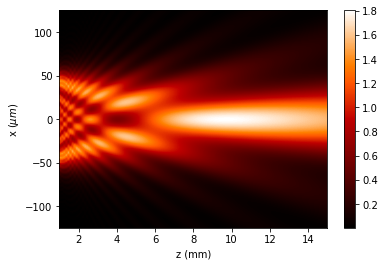

In [14]:
u2.draw(logarithm=0, z_scale="mm")
plt.colorbar()

### to data


In [15]:
xout = 0
yout = 0.0
z = 0.5 * mm

In [16]:
%%time
u2 = u1.CZT(z, xout, yout)
print("{}".format(np.abs(u2)**2))


[0.95645892]
CPU times: user 10.9 ms, sys: 1.2 ms, total: 12.1 ms
Wall time: 9.2 ms


### to field_X


In [17]:
xout = np.linspace(-size, size, 512)
yout = 0.0
z = 0.5 * mm

CPU times: user 36.5 ms, sys: 873 µs, total: 37.3 ms
Wall time: 35.7 ms


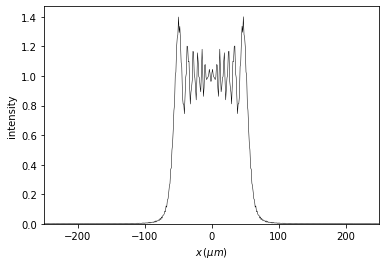

In [18]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw()


### to field_Z


The Z field is computed with a for loop, thus it is a bit slower.


In [19]:
xout = -1.0
yout = 0.0
z = np.linspace(0.25 * mm, 1 * mm, 64)

CPU times: user 399 ms, sys: 786 µs, total: 399 ms
Wall time: 398 ms


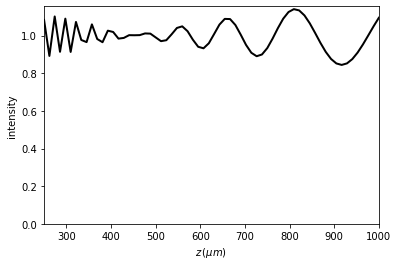

In [20]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw()


### to field_XZ


In [21]:
xout = np.linspace(-100 * um, 100 * um, 256)
yout = 0.0
z = np.linspace(0.25 * mm, 1 * mm, 128)

CPU times: user 1.5 s, sys: 0 ns, total: 1.5 s
Wall time: 1.53 s


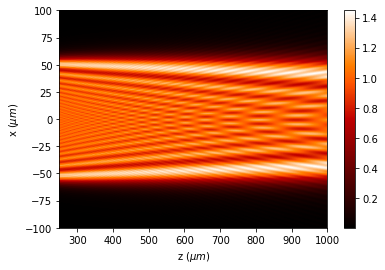

In [22]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw()
plt.colorbar()


## CZT for reducing the output size

Chirped z-Transform algorithm is specially indicated for cases where the output field is much smaller than the input field, as you can choose the position and sampling of the field. An important example for this is the focusing of a lens.


### X scheme


In [23]:
size = 3 * mm
xin = np.linspace(-size, size, 2048)
wavelength = 550 * nm
focal = 250 * mm

In [24]:
t0 = Scalar_mask_X(xin, wavelength)
t0.lens(x0=0, focal=focal)

u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0

In [25]:
xout = 0.0
z = np.linspace(focal - 30 * mm, focal + 30 * mm, 128)

CPU times: user 473 ms, sys: 4.78 ms, total: 478 ms
Wall time: 481 ms


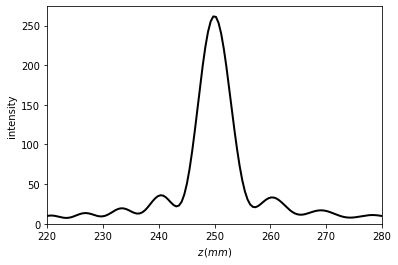

In [26]:
%%time
u2 = u1.CZT(z, xout, verbose=True)
u2.draw(z_scale='mm')


In [27]:
xout = np.linspace(-150 * um, 150 * um, 256)
z = focal

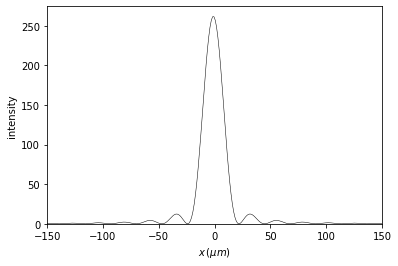

In [28]:
u2 = u1.CZT(focal, xout)
u2.draw()

In [29]:
xout = np.linspace(-150 * um, 150 * um, 256)
z = np.linspace(focal - 20 * mm, focal + 20 * mm, 128)

CPU times: user 781 ms, sys: 4.3 ms, total: 785 ms
Wall time: 782 ms


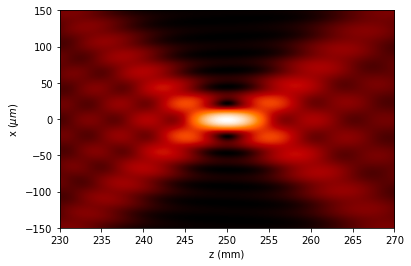

In [30]:
%%time
u2 = u1.CZT(z, xout, verbose=True)
u2.draw(logarithm=1e-1, z_scale='mm')


### XY scheme


In [31]:
size = 2 * mm
xin = np.linspace(-size, size, 256)
yin = np.linspace(-size, size, 512)
wavelength = 550 * nm
focal = 500 * mm

In [32]:
t0 = Scalar_mask_XY(xin, yin, wavelength)
t0.lens(r0=(0 * um, 0 * um), focal=focal, radius=0)
t0.pupil()

u0 = Scalar_source_XY(xin, yin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0

In [33]:
xout = np.linspace(-250 * um, 250 * um, 100)
yout = np.linspace(-250 * um, 250 * um, 128)
z = focal

num x, num y, num z = 100, 128, 1


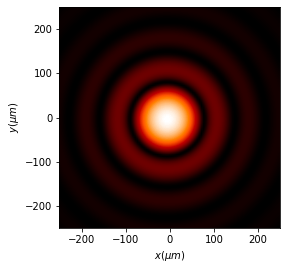

In [34]:
u2 = u1.CZT(z, xout, yout, verbose=True)
u2.draw(logarithm=1e-1)